# Visualising with LavaVu

[LavaVu](https://github.com/OKaluza/LavaVu) is a lightweight, automatable visualisation and analysis viewing utility.

> This notebook assumes you have run `distributed_mesh.py` in the tests folder with one or more processors.

How to load HDF5 data with h5py and display with LavaVu...

In [1]:
import glucifer
import h5py
import numpy

In [2]:
f = h5py.File('../Scripts/AusFlow1a.h5', 'r')

#Print some info about the data structures
lavavu.printH5(f)

('------ ', u'../Scripts/AusFlow1a.h5', ' ------')
<HDF5 group "/fields" (6 members)>
<HDF5 group "/geometry" (1 members)>
<HDF5 group "/labels" (2 members)>
<HDF5 group "/topology" (4 members)>
<HDF5 group "/vertex_fields" (6 members)>
<HDF5 group "/viz" (1 members)>


In [3]:
f.keys()

[u'fields', u'geometry', u'labels', u'topology', u'vertex_fields', u'viz']

In [4]:
for field in f['fields']:
    print(field)
    
for label in f['labels']:
    print(label)

decomp
flowLP
height
height0
lakes
slope
boundary
coarse


In [5]:
topography = f['fields']['height']
vertices = f['geometry']['vertices']
cells = f['viz']['topology']['cells']

boundary = f['labels']['boundary']['1']['indices']

In [6]:
#print topography[0:10],topography.shape
#print vertices[0:10],vertices.shape
#print cells[0:10],cells.shape
#print boundary[0:10],topography.shape

**Create a viewer**

In [7]:
lv = lavavu.Viewer(border=False, background="darkgrey", resolution=(1000,1000))

**Plot a triangle surface**

Can be vertices only (3 per tri) or vertices (shared) with indices (3 per tri)

In [8]:
#Convert the vertex & vector arrays to 3d with numpy
verts = numpy.reshape(vertices, (-1,2))
#Insert the topography layer in Y axis
verts = numpy.insert(verts, 2, values=topography, axis=1)

In [9]:
#Plot the triangles
tris = lv.triangles("surface")
tris.vertices(verts)
tris.indices(cells)

In [10]:
lv.defaultcolourmaps()

['diverge',
 'isolum',
 'isorainbow',
 'cubelaw',
 'cubelaw2',
 'smoothheat',
 'coolwarm',
 'spectral',
 'drywet',
 'elevation',
 'dem1',
 'dem2',
 'dem3',
 'dem4',
 'ocean',
 'bathy',
 'seafloor',
 'abyss',
 'ibcso',
 'gebco',
 'topo',
 'sealand',
 'nighttime',
 'world',
 'geo',
 'terra',
 'relief',
 'globe',
 'earth',
 'etopo1',
 'cubhelix',
 'hot',
 'cool',
 'copper',
 'gray',
 'split',
 'polar',
 'red2green',
 'paired',
 'categorical',
 'haxby',
 'jet',
 'panoply',
 'no_green',
 'wysiwyg',
 'seis',
 'rainbow',
 'nih']

**Add values, can be used to colour and filter the data**

In [11]:
#Use topography value to colour the surface
tris.values(topography, 'topography')
#tris.values(boundary, "boundary") #Load another field
#tris.values(tin["discharge"])
cm = tris.colourmap("etopo1") #Apply a built in colourmap
cb = tris.colourbar() #Add a colour bar

#Filter by min height value
tris["zmin"] = 0.011

**Apply an initial rotation and display an interactive viewer window**

Along with viewer window, controls can be added to adjust properties dynamically

In [12]:
lv.rotate('x', -60)

lv.window()
lv.control.Range(command='translate x ', range=(-5,5), step=0.1)
tris.control.Checkbox('wireframe')
tris.control.Range('zmin', range=(0,1), step=0.001)

lv.control.Range(command='background', range=(0,1), step=0.1, value=1)
lv.control.ObjectList()
lv.control.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
tris.reload()
lv.redisplay()

<IPython.core.display.Javascript object>

**Saving camera position, images and state**



In [14]:
lv.camera() #Get current camera as set in viewer

lv.translation(0.0, 0.0, -59.421)
lv.rotation(-60.0, 0.0, 0.0)



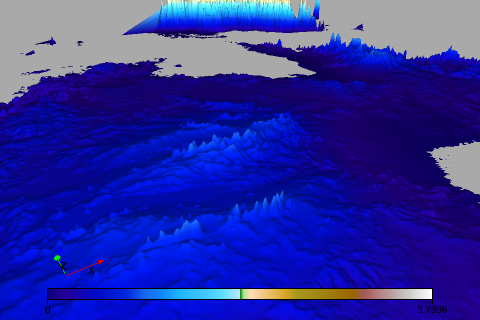

'saved.png'

In [15]:
#Plot a static image with a saved camera setup
lv.translation(0.00558684254065156, 1.16282057762146, -8.33703231811523)
lv.rotation(-0.487509340047836, 0.172793388366699, 0.269237726926804, 0.807206630706787)
lv.display(resolution=[480,320])
lv.image('saved.png', resolution=[640,480], transparent=True) #Save to disk

In [16]:
#State of properties and view can be loaded and saved to a file
lv.save("state.json")
#lv.file("state.json")


In [17]:
# lv.export(file="testdb", format="dbz")


In [18]:
%%sh

ls -trl

total 4789168
-rw-r--r--   1 lmoresi  staff       2474 16 Jun 10:02 austopo.xmf
-rw-r--r--   1 lmoresi  staff   44961076 16 Jun 10:02 austopo.h5
-rw-r--r--   1 lmoresi  staff       2489 16 Jun 10:02 port_macquarie_mesh_hr.xmf
-rw-r--r--   1 lmoresi  staff   69450040 16 Jun 10:02 port_macquarie_mesh_hr.h5
-rw-r--r--   1 lmoresi  staff       2477 16 Jun 10:02 port_macquarie_mesh_3s.xmf
-rw-r--r--   1 lmoresi  staff    9081948 16 Jun 10:02 port_macquarie_mesh_3s.h5
-rw-r--r--   1 lmoresi  staff       2486 16 Jun 10:02 port_macquarie_mesh.xmf
-rw-r--r--   1 lmoresi  staff  106844812 16 Jun 10:02 port_macquarie_mesh.h5
-rw-r--r--   1 lmoresi  staff      14310 16 Jun 10:02 poisson disc sampling.ipynb
-rw-r--r--   1 lmoresi  staff     660843 16 Jun 10:02 erosion - deposition timestep.ipynb
-rw-r--r--   1 lmoresi  staff  678670616 16 Jun 10:02 austopo_8M_points.h5
-rw-r--r--   1 lmoresi  staff    2754794 16 Jun 10:02 PixMesh_FlowPaths_N3.png
-rw-r--r--   1 lmoresi  staff     721239 16 Jun 10:0

SyntaxError: invalid syntax (<ipython-input-19-4b8b3d1b3cde>, line 1)